In [1]:
pip install wbdata

In [2]:
import wbdata
import datetime
import pandas as pd

In [3]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [4]:
#wbdata.get_country(300) # to see list of countries
LAMcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
          'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']
NAMcountries=['USA','CAN']
#regions=['LCN','WLD','NAC'] #WORLD = WLD; LAT AM AND CARRIBEAN = LCN; NAC=North America
regions=['NAC','WLD','LCN']
allcountries=LAMcountries+NAMcountries
allregions=allcountries+regions

In [5]:
allregions=country=('BE','BG','CZ','DK','DE','EE','IE','GR','ES','FR','HR','IT','CY','LV','LT','LU',
                                    'HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE','GBR')

In [6]:
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [7]:
wbdata.get_indicator(topic=19)

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2     Urban land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.UR.ZS     Urban land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.ZS        Land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)
AG.LND.IRIG.AG.ZS     Agricultural irrigated land (% of total agricultural land)
AG.LND.PRCP.MM        Average precipitation in depth (mm per year)
AG.YLD.CREL.KG      

In [44]:
indicators={"AG.LND.AGRI.ZS":        "Agricultural land (% of land area)",
            "EG.ELC.COAL.ZS":    "Electricity production from coal sources (% of total)",
            "EG.ELC.NGAS.ZS":    "Electricity production from natural gas sources (% of total)",
            "EN.ATM.CO2E.LF.ZS":     "CO2 emissions from liquid fuel consumption (% of total)",
            "EG.USE.PCAP.KG.OE":"Energy use (kg of oil equivalent per capita)",
            "SP.URB.GROW":           "Urban population growth (annual %)"
    }

In [45]:
datafile=wbdata.get_dataframe(indicators,country=allregions)

In [46]:
datafile2=datafile.copy() #creates a copy of dataframe; if you instead  do df2=df all changes to df2 will impact df
datafile2.reset_index(inplace=True)

In [47]:
datafile2['text']=datafile2['country']+datafile2['date'].map(str)

In [48]:
datafile2.tail

<bound method NDFrame.tail of       country  date  Agricultural land (% of land area)  \
0     Austria  2022                                 NaN   
1     Austria  2021                           31.476726   
2     Austria  2020                           31.539813   
3     Austria  2019                           32.128090   
4     Austria  2018                           32.147722   
...       ...   ...                                 ...   
1759   Sweden  1964                            9.679881   
1760   Sweden  1963                            9.773170   
1761   Sweden  1962                           10.242066   
1762   Sweden  1961                           10.401638   
1763   Sweden  1960                                 NaN   

      Electricity production from coal sources (% of total)  \
0                                                   NaN       
1                                                   NaN       
2                                                   NaN       
3        

In [50]:
datafile2.info()

<class 'wbdata.api.WBDataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 9 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   country                                                       1764 non-null   object 
 1   date                                                          1764 non-null   object 
 2   Agricultural land (% of land area)                            1411 non-null   float64
 3   Electricity production from coal sources (% of total)         1347 non-null   float64
 4   Electricity production from natural gas sources (% of total)  1347 non-null   float64
 5   CO2 emissions from liquid fuel consumption (% of total)       1337 non-null   float64
 6   Energy use (kg of oil equivalent per capita)                  1340 non-null   float64
 7   Urban population growth (annual %)                            1736 non-null

In [51]:
dfnas=datafile2.isnull()
dfnas

,country,date,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
0,False,False,True,True,True,True,True,False,False
1,False,False,False,True,True,True,True,False,False
2,False,False,False,True,True,True,True,False,False
3,False,False,False,True,True,True,True,False,False
4,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1759,False,False,False,False,False,False,False,False,False
1760,False,False,False,False,False,False,False,False,False
1761,False,False,False,False,False,False,False,False,False
1762,False,False,False,False,False,False,False,False,False


In [52]:
datafile2=datafile2.dropna()

In [53]:
datafile2.tail

<bound method NDFrame.tail of       country  date  Agricultural land (% of land area)  \
7     Austria  2015                           32.942923   
8     Austria  2014                           32.891420   
9     Austria  2013                           32.918080   
10    Austria  2012                           33.145904   
11    Austria  2011                           33.413718   
...       ...   ...                                 ...   
1758   Sweden  1965                            9.449116   
1759   Sweden  1964                            9.679881   
1760   Sweden  1963                            9.773170   
1761   Sweden  1962                           10.242066   
1762   Sweden  1961                           10.401638   

      Electricity production from coal sources (% of total)  \
7                                              8.226608       
8                                              7.970332       
9                                              9.456235       
10       

In [54]:
datafile2.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Croatia', 'Hungary', 'Ireland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic',
       'Slovenia', 'Sweden'], dtype=object)

In [55]:
datafile2.query("country == 'Austria'")
datafile2.query("country == 'Sweden'")
datafile2.query("country == 'Belgium'")
datafile2.query("country == 'Bulgaria'")
datafile2.query("country == 'Ireland'")
datafile2.query("country == 'Poland'")

,country,date,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
1393,Poland,2015,46.934910,80.906165,3.886431,20.294412,2490.206419,-0.273799,Poland2015
1394,Poland,2014,47.108005,82.993287,3.361345,19.622185,2473.406883,-0.283228,Poland2014
1395,Poland,2013,47.059208,85.206862,3.212984,19.109995,2565.670456,-0.266659,Poland2013
1396,Poland,2012,47.446280,84.357898,3.871103,21.003503,2566.574313,-0.207760,Poland2012
1397,Poland,2011,48.261111,86.790544,3.568582,21.400574,2653.403657,-0.130333,Poland2011
1398,Poland,2010,47.175787,88.092101,3.054320,20.923897,2640.238911,-0.469373,Poland2010
1399,Poland,2009,50.995821,89.248351,3.167660,20.995876,2466.524041,-0.115663,Poland2009
1400,Poland,2008,50.933725,90.887467,3.024368,20.768407,2564.775642,-0.171087,Poland2008
1401,Poland,2007,50.499478,91.826708,2.823741,19.543213,2527.408412,-0.237058,Poland2007
1402,Poland,2006,52.092583,92.450424,2.848897,19.030246,2536.978045,-0.244160,Poland2006


In [56]:
datafile2 = datafile2.rename(columns={'date': 'Year', 'country': 'Country'})

In [57]:
datafile2

,Country,Year,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
7,Austria,2015,32.942923,8.226608,12.601396,48.939788,3800.299420,1.449001,Austria2015
8,Austria,2014,32.891420,7.970332,8.772072,49.169389,3763.327903,1.112385,Austria2014
9,Austria,2013,32.918080,9.456235,10.302091,48.131118,3919.044419,0.919560,Austria2013
10,Austria,2012,33.145904,9.087469,14.133314,47.624254,3886.767732,0.511948,Austria2012
11,Austria,2011,33.413718,11.778970,19.973664,46.934592,3921.900515,-0.158922,Austria2011
...,...,...,...,...,...,...,...,...,...
1758,Sweden,1965,9.449116,0.028519,0.000000,84.431173,3437.540770,2.120644,Sweden1965
1759,Sweden,1964,9.679881,0.000000,0.000000,82.512136,3273.508965,1.975857,Sweden1964
1760,Sweden,1963,9.773170,0.108334,0.000000,81.112583,3080.414075,1.837287,Sweden1963
1761,Sweden,1962,10.242066,0.027228,0.000000,80.095735,2887.236252,1.874343,Sweden1962


In [58]:
# Function to change year type
def change_year_type(datafile2):

    #print("Changing type of Year for: " + df.loc[0]['Country'])
    # validation to check if year column exists in the dataframe
    if 'Year' in datafile2.columns:
        # convert year to a string
        datafile['Year'] = datafile2.Year.astype(str)

    print("Completed changing type")
    # return the updated df
    return datafile2

In [59]:
datafile2['Year'] = datafile2.Year.astype(str)

In [60]:
datafile2

,Country,Year,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
7,Austria,2015,32.942923,8.226608,12.601396,48.939788,3800.299420,1.449001,Austria2015
8,Austria,2014,32.891420,7.970332,8.772072,49.169389,3763.327903,1.112385,Austria2014
9,Austria,2013,32.918080,9.456235,10.302091,48.131118,3919.044419,0.919560,Austria2013
10,Austria,2012,33.145904,9.087469,14.133314,47.624254,3886.767732,0.511948,Austria2012
11,Austria,2011,33.413718,11.778970,19.973664,46.934592,3921.900515,-0.158922,Austria2011
...,...,...,...,...,...,...,...,...,...
1758,Sweden,1965,9.449116,0.028519,0.000000,84.431173,3437.540770,2.120644,Sweden1965
1759,Sweden,1964,9.679881,0.000000,0.000000,82.512136,3273.508965,1.975857,Sweden1964
1760,Sweden,1963,9.773170,0.108334,0.000000,81.112583,3080.414075,1.837287,Sweden1963
1761,Sweden,1962,10.242066,0.027228,0.000000,80.095735,2887.236252,1.874343,Sweden1962


In [61]:
datafile_copy=datafile2.drop(['Year', 'Country'], axis='columns')
datafile_copy.describe()

,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %)
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,48.648750,29.438192,13.423795,50.653326,3057.271711,0.775787
std,20.053340,26.336471,18.414648,21.405522,1381.468532,1.038164
min,7.058669,0.000000,0.000000,3.196994,322.490578,-3.447914
25%,36.961040,6.685986,0.178766,36.045345,2140.331998,0.137806
50%,53.844727,24.924771,4.849264,49.408379,2828.161026,0.670448
75%,64.532569,44.383858,18.523875,64.869739,3773.764080,1.453220
max,81.841855,97.492839,93.904625,103.011908,9428.811286,5.653996


In [62]:
import pandas as pd
import numpy as np
import requests

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-63-c53315d486c4>:8: FutureWarning: The default value of numeric_only in WBDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datafile_cleaned_us_copy.corr(), cmap='seismic', center=0,ax=ax)


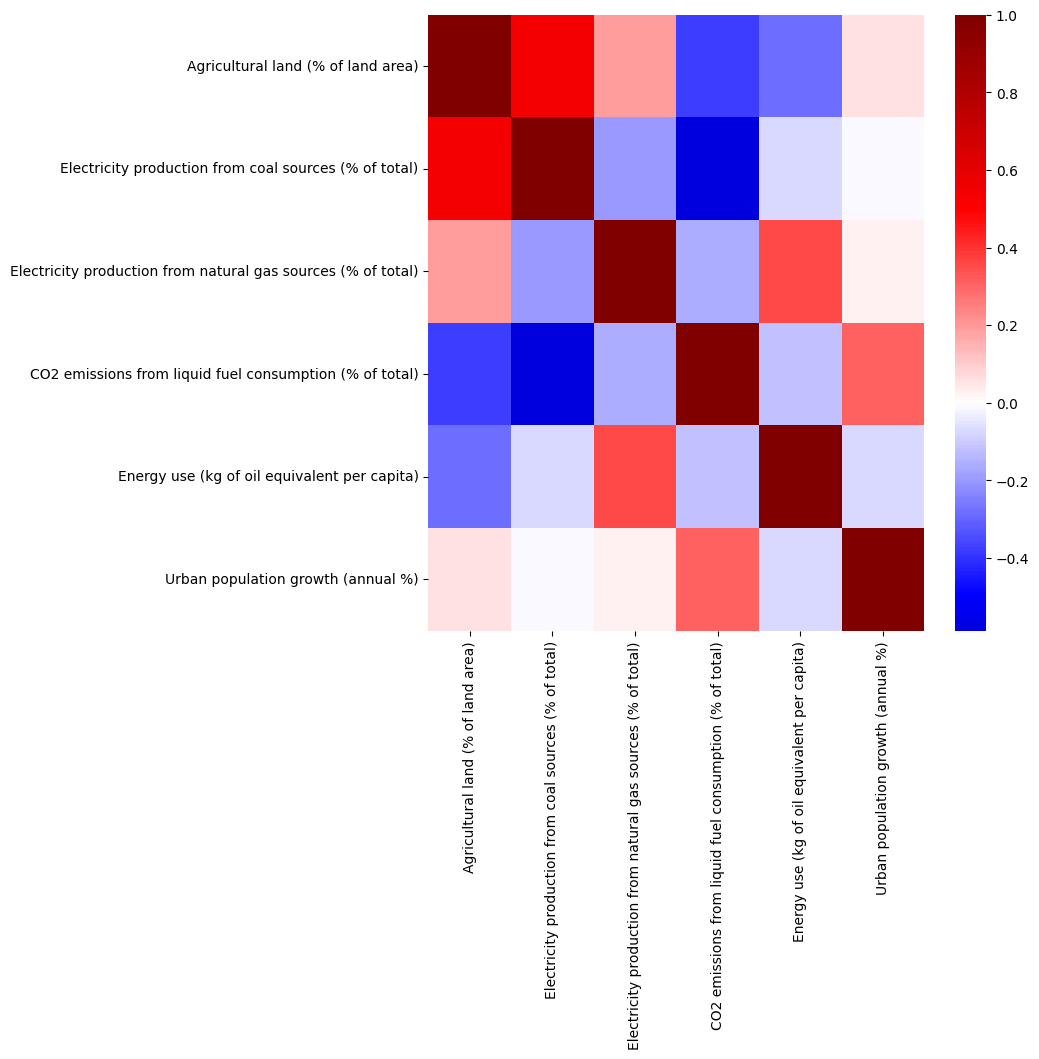

In [63]:
# create a copy
datafile_cleaned_us_copy=datafile2.copy()
# Exclude the categorical features from the matrix
datafile_cleaned_us_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(datafile_cleaned_us_copy.corr(), cmap='seismic', center=0,ax=ax)
plt.savefig('correlation_us.png')
plt.show()

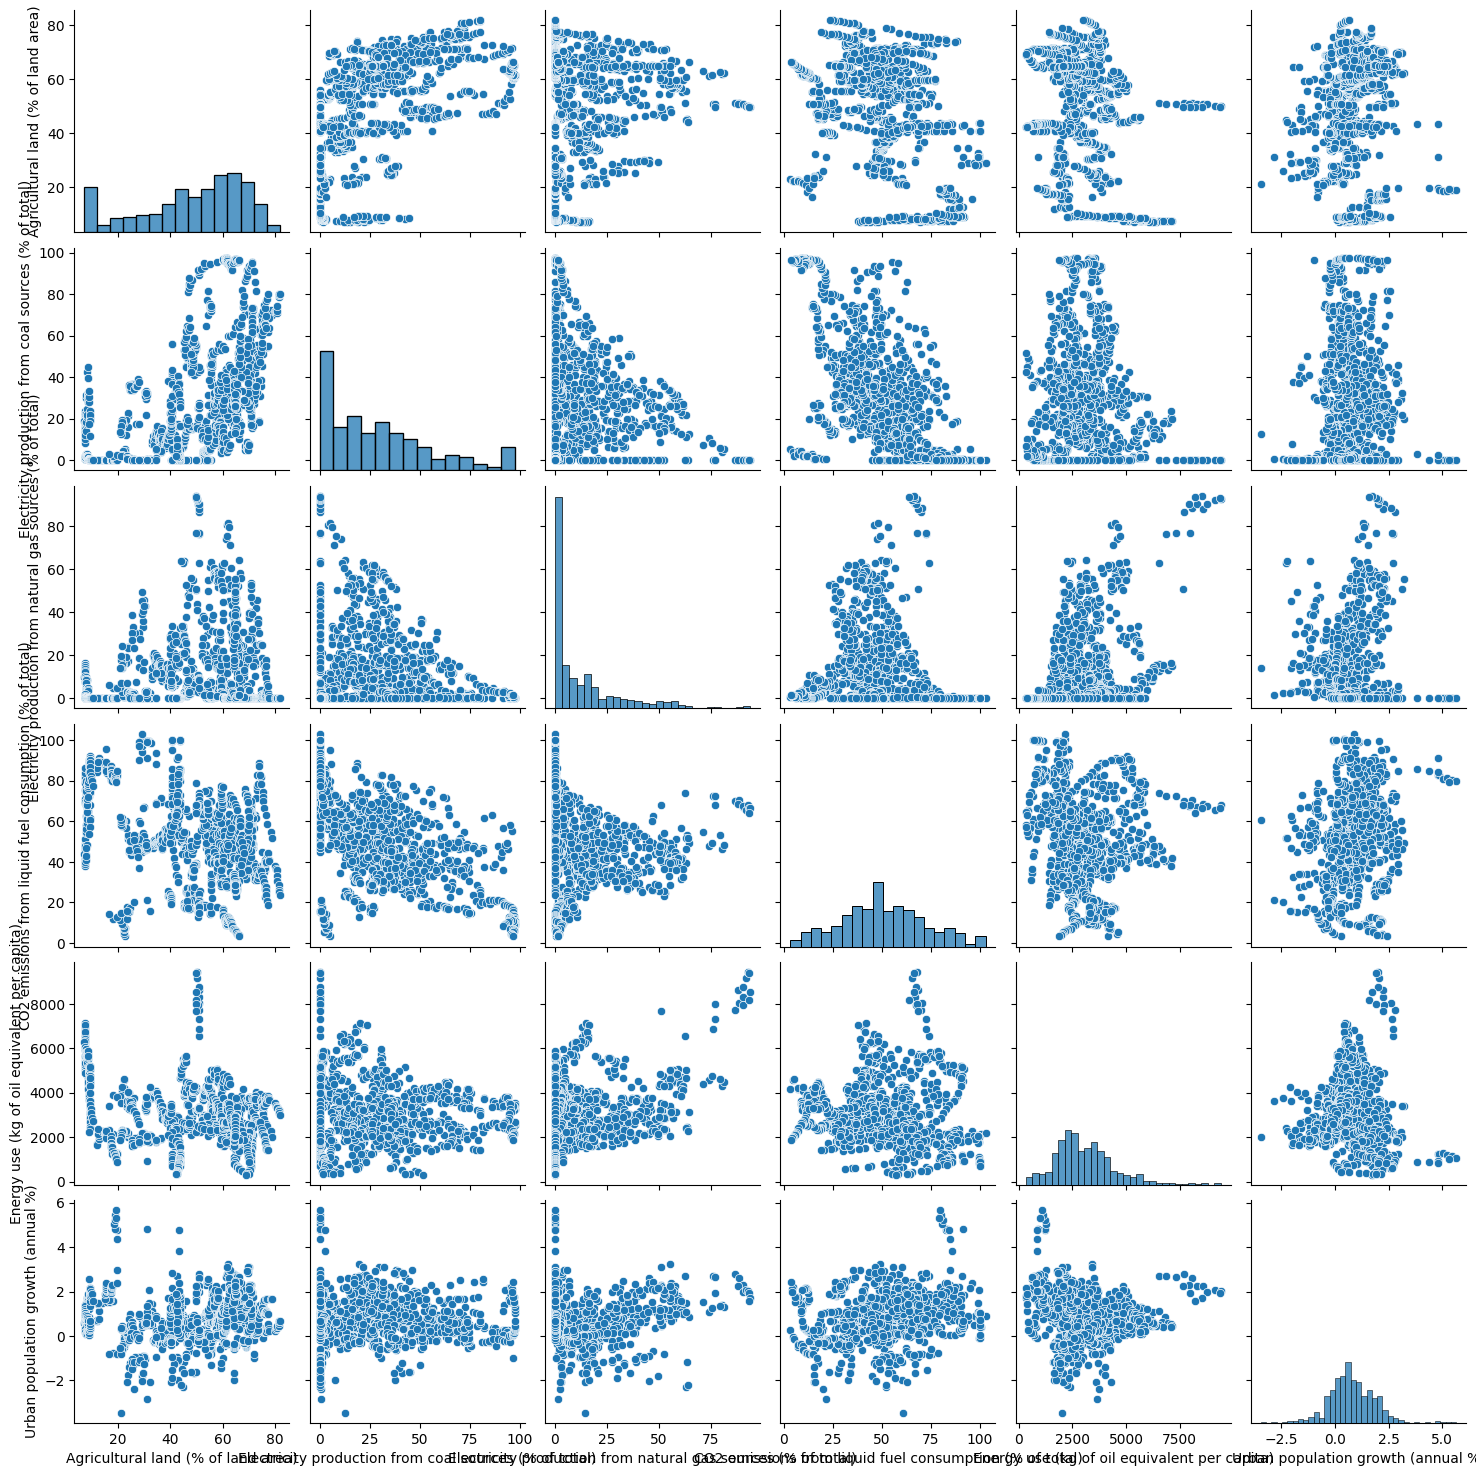

In [64]:
sns.pairplot(datafile2)

<Axes: xlabel='Electricity production from coal sources (% of total)', ylabel='Urban population growth (annual %)'>

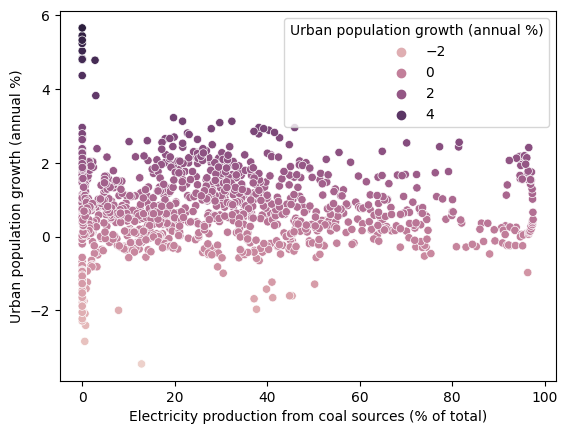

In [68]:
sns.scatterplot(x='Electricity production from coal sources (% of total)', y='Urban population growth (annual %)', data=datafile2, hue='Urban population growth (annual %)')

<Axes: xlabel='Electricity production from natural gas sources (% of total)', ylabel='Urban population growth (annual %)'>

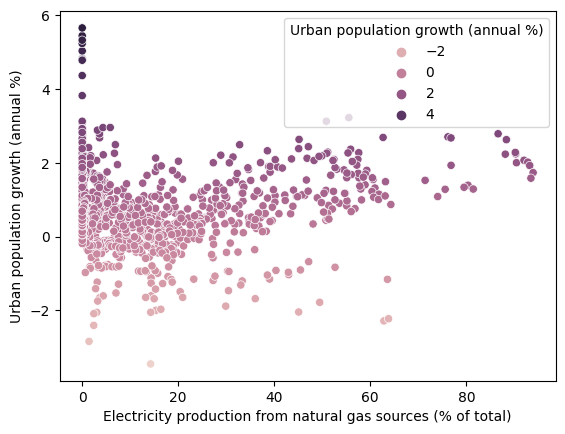

In [69]:
sns.scatterplot(x='Electricity production from natural gas sources (% of total)', y='Urban population growth (annual %)', data=datafile2, hue='Urban population growth (annual %)')

<Axes: xlabel='CO2 emissions from liquid fuel consumption (% of total)', ylabel='Urban population growth (annual %)'>

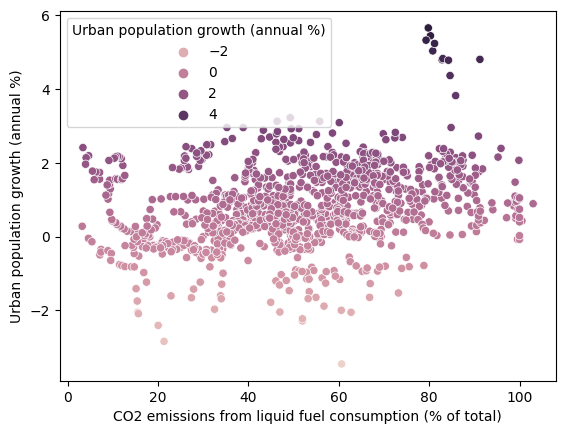

In [70]:
sns.scatterplot(x='CO2 emissions from liquid fuel consumption (% of total)', y='Urban population growth (annual %)', data=datafile2, hue='Urban population growth (annual %)')

<ipython-input-71-2db7e5c57563>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datafile2['Urban population growth (annual %)'], shade=True, color='blue')


<Axes: xlabel='Urban population growth (annual %)', ylabel='Density'>

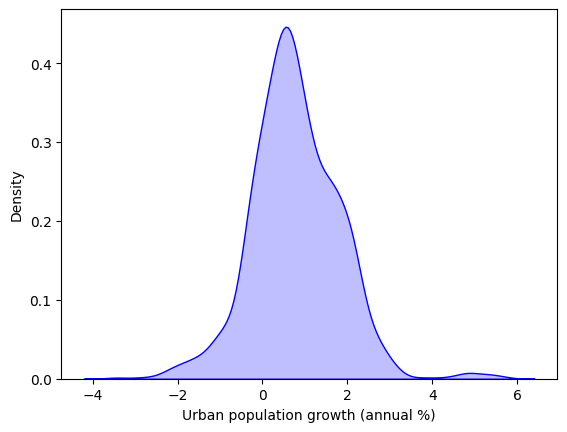

In [71]:
sns.kdeplot(datafile2['Urban population growth (annual %)'], shade=True, color='blue')

Agricultural land (% of land area)                                 Axes(0.125,0.653529;0.227941x0.226471)
Electricity production from coal sources (% of total)           Axes(0.398529,0.653529;0.227941x0.226471)
Electricity production from natural gas sources (% of total)    Axes(0.672059,0.653529;0.227941x0.226471)
CO2 emissions from liquid fuel consumption (% of total)            Axes(0.125,0.381765;0.227941x0.226471)
Energy use (kg of oil equivalent per capita)                    Axes(0.398529,0.381765;0.227941x0.226471)
Urban population growth (annual %)                              Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

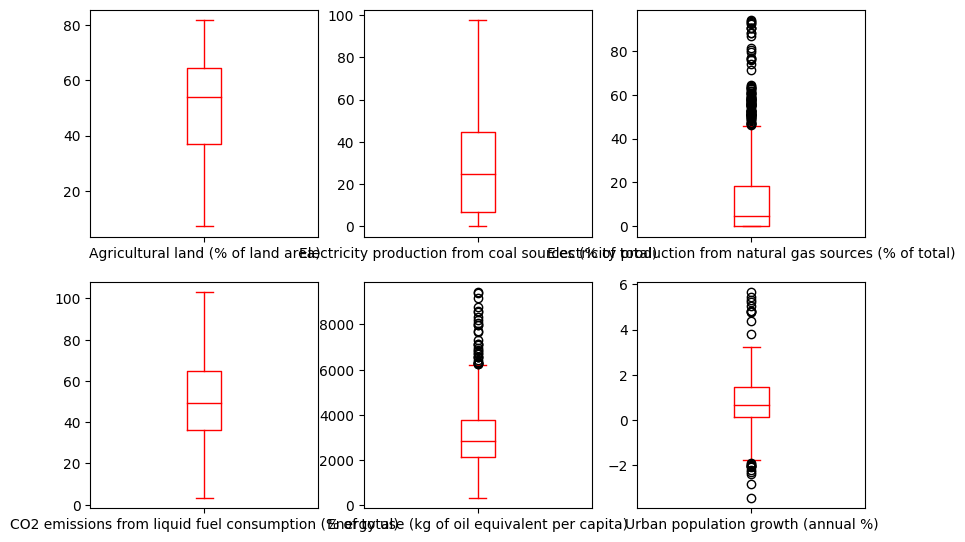

In [72]:
datafile2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 10), color='red')

In [73]:
datafile2.squeeze()

,Country,Year,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
7,Austria,2015,32.942923,8.226608,12.601396,48.939788,3800.299420,1.449001,Austria2015
8,Austria,2014,32.891420,7.970332,8.772072,49.169389,3763.327903,1.112385,Austria2014
9,Austria,2013,32.918080,9.456235,10.302091,48.131118,3919.044419,0.919560,Austria2013
10,Austria,2012,33.145904,9.087469,14.133314,47.624254,3886.767732,0.511948,Austria2012
11,Austria,2011,33.413718,11.778970,19.973664,46.934592,3921.900515,-0.158922,Austria2011
...,...,...,...,...,...,...,...,...,...
1758,Sweden,1965,9.449116,0.028519,0.000000,84.431173,3437.540770,2.120644,Sweden1965
1759,Sweden,1964,9.679881,0.000000,0.000000,82.512136,3273.508965,1.975857,Sweden1964
1760,Sweden,1963,9.773170,0.108334,0.000000,81.112583,3080.414075,1.837287,Sweden1963
1761,Sweden,1962,10.242066,0.027228,0.000000,80.095735,2887.236252,1.874343,Sweden1962


In [74]:
series=datafile2.squeeze()

In [75]:
ser = datafile2.iloc[:,0]

In [76]:
print(type(ser))

<class 'pandas.core.series.Series'>


In [77]:
datafile2

,Country,Year,Agricultural land (% of land area),Electricity production from coal sources (% of total),Electricity production from natural gas sources (% of total),CO2 emissions from liquid fuel consumption (% of total),Energy use (kg of oil equivalent per capita),Urban population growth (annual %),text
7,Austria,2015,32.942923,8.226608,12.601396,48.939788,3800.299420,1.449001,Austria2015
8,Austria,2014,32.891420,7.970332,8.772072,49.169389,3763.327903,1.112385,Austria2014
9,Austria,2013,32.918080,9.456235,10.302091,48.131118,3919.044419,0.919560,Austria2013
10,Austria,2012,33.145904,9.087469,14.133314,47.624254,3886.767732,0.511948,Austria2012
11,Austria,2011,33.413718,11.778970,19.973664,46.934592,3921.900515,-0.158922,Austria2011
...,...,...,...,...,...,...,...,...,...
1758,Sweden,1965,9.449116,0.028519,0.000000,84.431173,3437.540770,2.120644,Sweden1965
1759,Sweden,1964,9.679881,0.000000,0.000000,82.512136,3273.508965,1.975857,Sweden1964
1760,Sweden,1963,9.773170,0.108334,0.000000,81.112583,3080.414075,1.837287,Sweden1963
1761,Sweden,1962,10.242066,0.027228,0.000000,80.095735,2887.236252,1.874343,Sweden1962
